In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom_csv.csv')
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [3]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [4]:
df.drop(['bruises%3F','gill-attachment','gill-spacing','veil-type'],axis=1,inplace=True)

In [10]:
df.drop('stalk-root',axis=1,inplace=True)

In [11]:
le=LabelEncoder()
col=df.columns

In [6]:
for i in df['cap-shape']:
    df['cap-shape'] = le.fit_transform(df['cap-shape'])

for i in df['cap-surface']:
    df['cap-surface'] = le.fit_transform(df['cap-surface'])  
    

In [12]:
df

,cap-shape,cap-surface,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,n,p,n,k,e,s,s,w,w,w,o,p,k,s,u,p
1,5,2,y,a,b,k,e,s,s,w,w,w,o,p,n,n,g,e
2,0,2,w,l,b,n,e,s,s,w,w,w,o,p,n,n,m,e
3,5,3,w,p,n,n,e,s,s,w,w,w,o,p,k,s,u,p
4,5,2,g,n,b,k,t,s,s,w,w,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,n,n,b,y,e,s,s,o,o,o,o,p,b,c,l,e
8120,5,2,n,n,b,y,e,s,s,o,o,n,o,p,b,v,l,e
8121,2,2,n,n,b,n,e,s,s,o,o,o,o,p,b,c,l,e
8122,3,3,n,y,n,b,t,s,k,w,w,w,o,e,w,v,l,p


In [15]:
for i in df['cap-color']:
    df['cap-color'] = le.fit_transform(df['cap-color'])
for i in df['odor']:
    df['odor'] = le.fit_transform(df['odor']) 
for i in df['gill-size']:
    df['gill-size'] = le.fit_transform(df['gill-size'])
for i in df['gill-color']:
    df['gill-color'] = le.fit_transform(df['gill-color'])
for i in df['stalk-shape']:
    df['stalk-shape'] = le.fit_transform(df['stalk-shape']) 
for i in df['stalk-surface-above-ring']:
    df['stalk-surface-above-ring'] = le.fit_transform(df['stalk-surface-above-ring'])
for i in df['stalk-surface-below-ring']:
    df['stalk-surface-below-ring'] = le.fit_transform(df['stalk-color-below-ring'])
for i in df['stalk-color-above-ring']:
    df['stalk-color-above-ring'] = le.fit_transform(df['stalk-color-above-ring'])    
for i in df['stalk-color-below-ring']:
    df['stalk-color-below-ring'] = le.fit_transform(df['stalk-color-below-ring'])    
for i in df['veil-color']:
    df['veil-color'] = le.fit_transform(df['veil-color'])
for i in df['ring-number']:
    df['ring-number'] = le.fit_transform(df['ring-number'])    
for i in df['ring-type']:
    df['ring-type'] = le.fit_transform(df['ring-type'])
for i in df['spore-print-color']:
    df['spore-print-color'] = le.fit_transform(df['spore-print-color'])    
for i in df['population']:
    df['population'] = le.fit_transform(df['population'])
for i in df['habitat']:
    df['habitat'] = le.fit_transform(df['habitat'])    
for i in df['class']:
    df['class'] = le.fit_transform(df['class'])        

In [16]:
df

,cap-shape,cap-surface,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,6,1,4,0,2,7,7,7,2,1,4,2,3,5,1
1,5,2,9,0,0,4,0,2,7,7,7,2,1,4,3,2,1,0
2,0,2,8,3,0,5,0,2,7,7,7,2,1,4,3,2,3,0
3,5,3,8,6,1,5,0,2,7,7,7,2,1,4,2,3,5,1
4,5,2,3,5,0,4,1,2,7,7,7,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,0,11,0,2,5,5,5,1,1,4,0,1,2,0
8120,5,2,4,5,0,11,0,2,5,5,5,0,1,4,0,4,2,0
8121,2,2,4,5,0,5,0,2,5,5,5,1,1,4,0,1,2,0
8122,3,3,4,8,1,0,1,2,7,7,7,2,1,0,7,4,2,1


In [17]:
df.describe()

,cap-shape,cap-surface,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,4.144756,0.309207,4.810684,0.567208,1.575086,5.794682,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,2.103729,0.462195,3.540359,0.495493,0.621459,1.907291,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,6.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,5.000000,0.000000,5.000000,1.000000,2.000000,7.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,5.000000,1.000000,7.000000,1.000000,2.000000,7.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,8.000000,1.000000,11.000000,1.000000,3.000000,8.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   odor                      8124 non-null   int64
 4   gill-size                 8124 non-null   int64
 5   gill-color                8124 non-null   int64
 6   stalk-shape               8124 non-null   int64
 7   stalk-surface-above-ring  8124 non-null   int64
 8   stalk-surface-below-ring  8124 non-null   int32
 9   stalk-color-above-ring    8124 non-null   int64
 10  stalk-color-below-ring    8124 non-null   int64
 11  veil-color                8124 non-null   int64
 12  ring-number               8124 non-null   int64
 13  ring-type                 8124 non-null   int64
 14  spore-print-color         8124 non-null 

In [19]:
cor=df.corr()

In [20]:
cor

,cap-shape,cap-surface,cap-color,odor,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.021935,0.054050,-0.006039,0.063794,-0.030417,-0.030390,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.045233,0.208100,-0.161017,-0.014123,0.089090,0.068885,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.387121,-0.169464,0.084659,-0.456496,-0.060837,0.008057,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
odor,-0.021935,0.045233,-0.387121,1.000000,0.310495,-0.129213,0.459766,0.118617,0.169407,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-size,0.054050,0.208100,-0.169464,0.310495,1.000000,-0.516736,0.214576,0.056310,0.278708,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,-0.129213,-0.516736,1.000000,-0.175699,0.224287,-0.074781,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.459766,0.214576,-0.175699,1.000000,0.015193,0.235794,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019
stalk-surface-above-ring,-0.030417,0.089090,-0.060837,0.118617,0.056310,0.224287,0.015193,1.000000,0.142835,0.132708,0.142835,-0.090591,0.107904,0.390091,0.100764,0.079604,-0.058076,-0.334593
stalk-surface-below-ring,-0.030390,0.068885,0.008057,0.169407,0.278708,-0.074781,0.235794,0.142835,1.000000,0.491510,1.000000,0.065567,0.087580,-0.034284,0.254518,-0.242792,0.041594,-0.146730
stalk-color-above-ring,-0.031659,0.066050,0.002364,0.174532,0.296548,-0.058299,0.223439,0.132708,0.491510,1.000000,0.491510,0.067377,0.084917,-0.048878,0.271533,-0.240261,0.042561,-0.154003


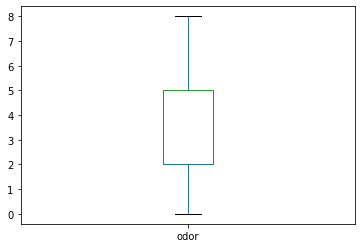

In [21]:
df['odor'].plot.box()

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.02971224, 0.14012794, 0.19824983, ..., 0.5143892 , 2.03002809,
        1.0366127 ],
       [1.02971224, 0.14012794, 1.76587407, ..., 1.31310821, 0.29572966,
        0.96468045],
       [2.08704716, 0.14012794, 1.37304929, ..., 1.31310821, 0.86714922,
        0.96468045],
       ...,
       [0.8403434 , 0.14012794, 0.19824983, ..., 2.11182722, 0.28570978,
        0.96468045],
       [0.21699152, 0.95327039, 0.19824983, ..., 0.28432981, 0.28570978,
        1.0366127 ],
       [1.02971224, 0.14012794, 0.19824983, ..., 2.11182722, 0.28570978,
        0.96468045]])

In [23]:
print(np.where(z>3))

(array([1816, 1816, 2128, ..., 8120, 8121, 8123], dtype=int64), array([ 8, 10,  8, ..., 11, 11, 11], dtype=int64))


In [30]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(6568, 18)

In [31]:
df.shape

(8124, 18)

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,17:18]


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [40]:
x_train.shape

(5254, 17)

In [41]:
y_train.shape

(5254, 1)

In [42]:
x_test.shape

(1314, 17)

In [44]:
y_test.shape

(1314, 1)

In [56]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[699   0]
 [  0 615]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       699
           1       1.00      1.00      1.00       615

    accuracy                           1.00      1314
   macro avg       1.00      1.00      1.00      1314
weighted avg       1.00      1.00      1.00      1314



In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
dtscore=cross_val_score(DT,x,y,cv=7)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [0.93184239 1.         0.99680171 1.         1.         1.
 0.89765458]
0.9751855250707406 0.03931551214554423


In [59]:
from sklearn.externals import joblib
joblib.dump(DT,'DT_Mashroom.pkl')

['DT_Mashroom.pkl']